In [ ]:
### TODO
#
# - clean the graph to simplify the problem
#   - FORMAT 1
#        - for nodes with multiple transactions between themselves, keep only one directed adge - remove all others. This edge will contain the number of transactions and the average amount of those transactions
#
#
#
#

In [2]:
import pandas as pd
import networkx as nx
import numpy as np

# Read in the CSV files
accounts_df = pd.read_csv("data/accounts.csv")
transactions_df = pd.read_csv("data/transactions.csv")

# Create a directed graph
graph = nx.MultiDiGraph()
graph2 = nx.DiGraph()

# Add nodes to the graph using the accounts DataFrame
for index, row in accounts_df.iterrows():
    graph.add_node(row["acct_id"], initial_deposit=row["initial_deposit"])
    graph2.add_node(row["acct_id"], initial_deposit=row["initial_deposit"])

# Add edges to the graph using the transactions DataFrame
for index, row in transactions_df.iterrows():
    graph.add_edge(row["orig_acct"], row["bene_acct"], base_amt=row["base_amt"], is_sar=row["is_sar"])

# Print out some information about the graph
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())


Number of nodes: 1446
Number of edges: 121457


In [3]:
'''
for node in graph.nodes:
    print(node, graph.nodes[node])
print("Edge information:")
for edge in graph.edges:
    print(edge, graph.edges[edge])
'''

for u in graph.nodes:
    graph2.nodes[u]["is_sar"] = False

for u in graph.nodes: #loop through nodes. Current node is u
    tsc_amts = []
    for v in graph.predecessors(u):#loop though in degree nodes v
        ### WRONG ###
        #e_v2u = graph.in_edges(v, data=True) #edges from 
        e_v2u = [(s, t, d) for (s, t, d) in graph.edges(v, data=True) if t == u]
        #print(e_v2u)
        #print(e_v2u)
        edge_tsc_amts = []
        is_sar = False
        if e_v2u:
            for edge in e_v2u: #for each edge from v to u
                
                src, dest, attrs = edge
                edge_tsc_amts.append(attrs["base_amt"])
                if attrs["is_sar"] == True:
                    is_sar = True
            
            #get stats on edges
            v2u_total = np.sum(edge_tsc_amts)
            v2u_mean = np.mean(edge_tsc_amts)
            v2u_min = np.min(edge_tsc_amts)
            v2u_max = np.max(edge_tsc_amts)
            v2u_std = np.std(edge_tsc_amts)
            v2u_is_sar = is_sar
            v2u_count = len(edge_tsc_amts)

            graph2.add_edge(v, u, total_tsc_amt=v2u_total, mean_tsc_amt=v2u_mean, min_tsc_amt=v2u_min, max_tsc_amt=v2u_max, std_tsc_amt=v2u_std, num_of_tsc=v2u_count, contains_is_sar_tsc=v2u_is_sar)
            
            if v2u_is_sar == True:
                graph2.nodes[u]["is_sar"] = True
                graph2.nodes[v]["is_sar"] = True
            

print("Number of nodes:", graph2.number_of_nodes())
print("Number of edges:", graph2.number_of_edges())
        

Number of nodes: 1446
Number of edges: 6984


In [4]:
import matplotlib.pyplot as plt
nodes_df = pd.DataFrame.from_dict(dict(graph2.nodes(data=True)), orient='index')
nodes_df.to_csv('accounts_cleaned.csv')
#nodes_df.is_sar.hist()
#np.sum(np.isnan(nodes_df.is_sar.tolist()))
#b = np.array(nodes_df.is_sar.tolist())
#print(len(b[b==True]), len(b[b==False]),len(b[b==True]) + len(b[b==False]), len(b[b==True])/(len(b[b==True]) + len(b[b==False])))

edges_df = pd.DataFrame([(u, v, d['total_tsc_amt'], d['mean_tsc_amt'], d['min_tsc_amt'], d['max_tsc_amt'], d['std_tsc_amt'], d['num_of_tsc'], d['contains_is_sar_tsc']) for u, v, d in graph2.edges(data=True)], columns=['source', 'target', 'total_tsc_amt','mean_tsc_amt', 'min_tsc_amt', 'max_tsc_amt', 'std_tsc_amt', 'num_of_tscs', 'contains_is_sar_tsc'])
edges_df.to_csv('transactions_cleaned.csv')


In [ ]:
print(nodes_df)
print(edges_df)

      initial_deposit  is_sar
0            96646.86   False
1            80707.36   False
2            52101.10   False
3            90324.40   False
4            91267.86   False
...               ...     ...
1441         61754.39   False
1442         88437.72   False
1443         84987.77   False
1444         50857.55   False
1445         75294.22   False

[1446 rows x 2 columns]
      source  target  total_tsc_amt  mean_tsc_amt  min_tsc_amt  max_tsc_amt  \
0          0      19       46768.99    563.481807        95.51       998.89   
1          0      20       43773.90    527.396386         6.79       995.51   
2          0     211        9541.32    454.348571       134.48       983.69   
3          1      11       10305.92    515.296000       179.59       971.46   
4          1      13       11016.91    550.845500       203.30       958.91   
...      ...     ...            ...           ...          ...          ...   
6979    1442      10       43147.67    519.851446       100.17

In [5]:
!pip3 install ConfigModel-MCMC

  Using cached ConfigModel_MCMC-0.0.10-py3-none-any.whl (27 kB)
  Using cached numba-0.49.1.tar.gz (2.0 MB)
  Preparing metadata (setup.py) ... done
  Using cached arch-5.0.1.tar.gz (937 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached python-igraph-0.9.6.tar.gz (3.6 MB)
  Preparing metadata (setup.py) ... done
  Using cached tqdm-4.62.2-py2.py3-none-any.whl (76 kB)
  Using cached property_cached-1.6.4-py2.py3-none-any.whl (7.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 6.8 MB/s eta 0:00:0000:0100:01m
  Using cached llvmlite-0.32.1.tar.gz (104 kB)
  Preparing metadata (setup.py) ... done
  Using cached texttable-1.6.7-py2.py3-none-any.whl (10 kB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for arch (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [153 lines of output]
      /p

In [35]:
from   utils.graphConversion import __conversion__
import basicTests.basictest as bt
import localisation.localisationMeasures as lm
import netemdMethods.netEMDmeasures as nemdM
import pathFinder.pathFinder as pf

In [4]:
accounts_df = pd.read_csv("accounts_cleaned.csv")
transactions_df = pd.read_csv("transactions_cleaned.csv")

In [5]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)
# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torch_geometric.transforms import NormalizeFeatures

def visualize(h, color):
    z = TSNE(n_components=2, learning_rate='auto',
             init='random').fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

def print_model_size(model):
    tot = sum([p.numel() for p in model.parameters() if p.requires_grad])
    out = f"Number of model ({model.__class__.__name__}) parameters:{tot:10d}"
    print("=" * len(out))
    print(out)

2.0.0


In [6]:
from torch.utils.data import random_split
# Define your graph
x = torch.nn.functional.normalize(torch.tensor(nodes_df.initial_deposit.to_numpy()).unsqueeze(dim=1),dim=0).to(torch.float32)  # (n x features)
edge_index =  torch.stack([torch.tensor(edges_df.source.to_numpy()),torch.tensor(edges_df.target.to_numpy())],dim=-1).T  # Define your edge index
edge_attr = torch.nn.functional.normalize(torch.tensor(np.array(edges_df[['total_tsc_amt','mean_tsc_amt', 'min_tsc_amt', 'max_tsc_amt', 'std_tsc_amt', 'num_of_tscs', 'contains_is_sar_tsc']].values,dtype='float32')),dim=0) # edge features
y =  torch.tensor(nodes_df.is_sar.to_numpy().astype(int)) # target values

train_size = int(0.6 * len(y))  # 60% of the dataset for training
val_size = int(0.2 * len(y))    # 20% of the dataset for validation
test_size = len(y) - train_size - val_size  # Remaining 20% for testing

train_dataset, val_dataset, test_dataset = random_split(y, [train_size, val_size, test_size])

# Create masks for train, validation, and test sets
train_mask = torch.zeros(len(y), dtype=torch.bool)
val_mask = torch.zeros(len(y), dtype=torch.bool)
test_mask = torch.zeros(len(y), dtype=torch.bool)

train_mask[train_dataset.indices] = True
val_mask[val_dataset.indices] = True
test_mask[test_dataset.indices] = True

In [154]:
edge_attr.dtype

torch.float32

In [7]:
from torch_geometric.data import Data
# Load your data into PyTorch Geometric's Data class
data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y,train_mask=train_mask, val_mask=val_mask, test_mask=test_mask)


In [ ]:
# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')

print('==============================')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')
print(f'Is weighted: {data.edge_weight is not None}')

print('==============================')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')

Number of nodes: 1446
Number of edges: 6984
Average node degree: 4.83
Has isolated nodes: True
Has self-loops: False
Is undirected: False
Is weighted: False
Number of training nodes: 867
Training node label rate: 0.60


In [105]:
import torch

from torch.nn import Linear
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import degree

def random_walk_matrix(edge_index, num_nodes: int = None):
    source, target = edge_index[0], edge_index[1]
    in_deg = degree(target, num_nodes=num_nodes)   # D
    edge_weight = 1 / in_deg[target]               # D^-1 A
    return edge_index, edge_weight


class MPNN(MessagePassing):
    def __init__(self, in_channels: int, out_channels: int, in_channels2: int):
        super().__init__(aggr="add")                         # "sum" aggregation
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.lin_message = Linear(in_channels, out_channels, # weights 𝚯_1
                                  bias=False)
        self.lin_update = Linear(in_channels2, out_channels,  # weights 𝚯_2
                                 bias=True)                  # the bias vector 𝐛
        
        self.lin1 = Linear(in_channels, out_channels)
        self.lin2 = Linear(out_channels, out_channels)

    def forward(self, x, edge_index, edge_attr=None):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]
        # edge_attr has shape [E, edge_dim]
        #print('x', x.size())
        #print('edge_index', edge_index.size())
        #print('edge_attr', edge_attr.size())

        if edge_attr is None:
            edge_attr = torch.ones((edge_index.size(1), 1), device=x.device)
        # 1. m_j→𝑖 = x_j𝚯_1
        m_ji = self.lin_message(x)  # we can project here with isotropic GNNs
        #m_ji = x  # I decided since we only have one feature, it doesnt make sense to apply a linear to dim 16
        # 2. m_𝑖 = add(ã_ji ⋅ m_j→𝑖)_j∈𝑁(i)
        #print('mji', m_ji.size())
        m_i = self.propagate(edge_index, m=m_ji, edge_attr=edge_attr)
        # 3. h_𝑖 = tanh(x_i𝚯_2 + m_i + 𝐛)
        #print('mi', m_i.size())
        #h_i = torch.tanh(self.lin_update(x) + m_i)
        a = torch.cat([x, m_i], dim=-1)
        #print('ehh')
        #print('here', a.size())
        #print('ehh2')
        
        #print()
        #print('here2', self.lin_update(a).size())
        h_i = torch.tanh(self.lin_update(a))
        return h_i

    def message(self, m_j, edge_attr):
        # x_j has shape [E, in_channels]
        # edge_attr has shape [E, edge_dim]

        #print(m_j)
        #print(m_j.size())
        #print(edge_attr.size())
        #return edge_attr.reshape(-1, 1) * m_j
        #return edge_attr.view(-1, 1) * m_j
        return torch.cat([m_j, edge_attr], dim=-1)
        
        #The code return edge_attr.view(-1, 1) * x_j multiplies the input message x_j with the edge attributes edge_attr.
        #Here, x_j represents the message passed from the node j to its neighbor node i, and edge_attr represents the corresponding edge attribute associated with the edge connecting the nodes i and j.
        #The view(-1, 1) method call is used to reshape edge_attr to have one column and as many rows as there are messages passed between nodes. This is done so that the multiplication operation between x_j and edge_attr can be performed element-wise between the corresponding rows of x_j and edge_attr.
        #The resulting tensor has the same shape as x_j and represents the transformed messages to be aggregated by the receiving node i.

#    def message(self, m_j, edge_weight):
#        return edge_weight.view(-1, 1) * m_j  # ã_ji ⋅ m_j→𝑖


In [10]:
gso_index, gso_weight = random_walk_matrix(data.edge_index, data.num_nodes)
print(f"Edge weights: {gso_weight}")
print(gso_index)

Edge weights: tensor([0.0123, 0.0128, 0.3333,  ..., 0.5000, 0.1250, 0.0204])
tensor([[   0,    0,    0,  ..., 1443, 1444, 1445],
        [  19,   20,  211,  ...,  557,  159,    8]])


In [11]:
a = torch.tensor([0,1,2,3,0,0])
deg = degree(a, num_nodes=None)
deg[a] #UNUSUAL BEHAVIOUR I DID NOT KNOW ABOUT

tensor([3., 1., 1., 1., 3., 3.])

In [128]:
import torch

from torch.nn import Linear

HIDDEN_SIZE = 16 #@param
NUM_LAYERS = 2 #@param

dataset_num_features = 1
dataset_num_classes = 2

class GNNModel(torch.nn.Module):

    def __init__(self, hidden_size: int,
                 num_layers: int = 1):
        super().__init__()
        torch.manual_seed(12345)

        self.mpnns = torch.nn.ModuleList()
        for l in range(num_layers):
            #in_size = dataset_num_features if l == 0 else hidden_size
            in_size = dataset_num_features if l == 0 else hidden_size
            in_size2 = 24 if l == 0 else 39
            mpnn = MPNN(in_channels=in_size, out_channels=hidden_size, in_channels2=in_size2)
            self.mpnns.append(mpnn)

        self.lin_out = Linear(hidden_size, dataset_num_classes)
    
    def forward(self, x, edge_index, edge_attr=None):
        # Message-passing: transform node features based on neighbors
        for mpnn in self.mpnns:
            #x = mpnn(x, edge_index, edge_weight)
            x = mpnn(x, edge_index, edge_attr=edge_attr)
        # Decoder: post-process extracted features
        out = self.lin_out(x)
        return out

model = GNNModel(HIDDEN_SIZE, NUM_LAYERS)
print(model)
print_model_size(model)

GNNModel(
  (mpnns): ModuleList(
    (0): MPNN(1, 16)
    (1): MPNN(16, 16)
  )
  (lin_out): Linear(in_features=16, out_features=2, bias=True)
)
Number of model (GNNModel) parameters:      2194


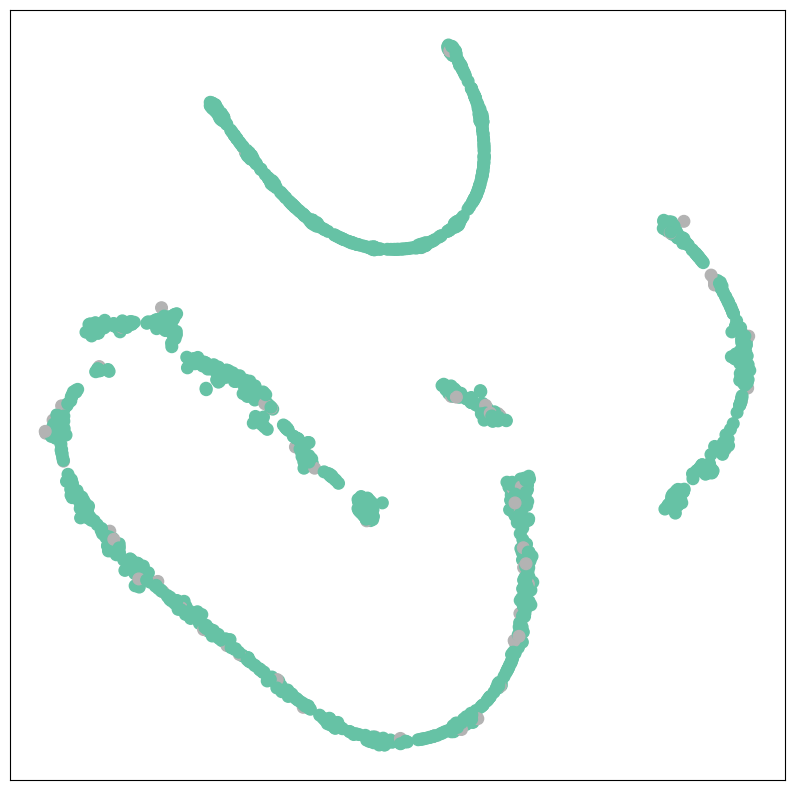

In [129]:
model = GNNModel(HIDDEN_SIZE, NUM_LAYERS)
model.eval()

out = model(data.x, data.edge_index, edge_attr=data.edge_attr)
visualize(out, color=data.y)

In [170]:
sum(data.y.isnan())

tensor(0)

In [139]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 100})'''))

model = GNNModel(HIDDEN_SIZE, NUM_LAYERS)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

def train():
      model.train()
      optimizer.zero_grad()
      # We now give as input also the graph connectivity
      #out = model(data.x, gso_index, gso_weight)
      out = model(data.x, data.edge_index, data.edge_attr)
      print(len(out[data.train_mask]),len(data.y[data.train_mask]))
      loss = criterion(out[data.train_mask], data.y[data.train_mask])
      loss.backward()
      optimizer.step()
      return loss

def test(mask):
      model.eval()
      out = model(data.x, data.edge_index, data.edge_attr)
      pred = out.argmax(dim=1)
      test_correct = pred[mask] == data.y[mask]
      test_acc = int(test_correct.sum()) / int(mask.sum())
      return test_acc, out, pred

for epoch in range(1, 201):
    train_loss = train()
    val_loss, _, _ = test(data.val_mask)
    print(f'Epoch: {epoch:03d} - Training loss: {train_loss:.4f} - '
          f'Validation accuracy: {val_loss * 100:.2f}%')

<IPython.core.display.Javascript object>

867 867
Epoch: 001 - Training loss: 0.6611 - Validation accuracy: 72.32%
867 867
Epoch: 002 - Training loss: 0.5183 - Validation accuracy: 94.81%
867 867
Epoch: 003 - Training loss: 0.4167 - Validation accuracy: 94.81%
867 867
Epoch: 004 - Training loss: 0.3499 - Validation accuracy: 94.81%
867 867
Epoch: 005 - Training loss: 0.3155 - Validation accuracy: 94.81%
867 867
Epoch: 006 - Training loss: 0.2960 - Validation accuracy: 94.81%
867 867
Epoch: 007 - Training loss: 0.2843 - Validation accuracy: 94.81%
867 867
Epoch: 008 - Training loss: 0.2765 - Validation accuracy: 94.81%
867 867
Epoch: 009 - Training loss: 0.2704 - Validation accuracy: 94.81%
867 867
Epoch: 010 - Training loss: 0.2646 - Validation accuracy: 94.81%
867 867
Epoch: 011 - Training loss: 0.2559 - Validation accuracy: 94.81%
867 867
Epoch: 012 - Training loss: 0.2500 - Validation accuracy: 94.81%
867 867
Epoch: 013 - Training loss: 0.2450 - Validation accuracy: 94.81%
867 867
Epoch: 014 - Training loss: 0.2404 - Valida

In [133]:
test_acc, test_out, test_pred  = test(data.test_mask)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

Test Accuracy: 98.62%


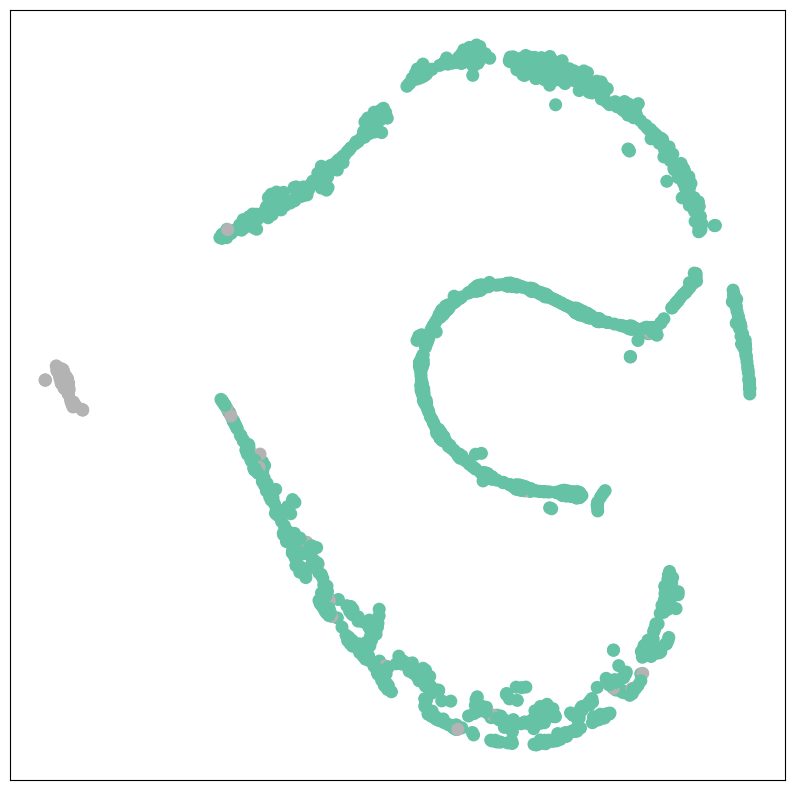

In [134]:
out = model(data.x, data.edge_index, data.edge_attr)
visualize(out, color=data.y)

[0.00317589 0.0236709  0.03482613 ... 0.01191366 0.01098301 0.01164088]


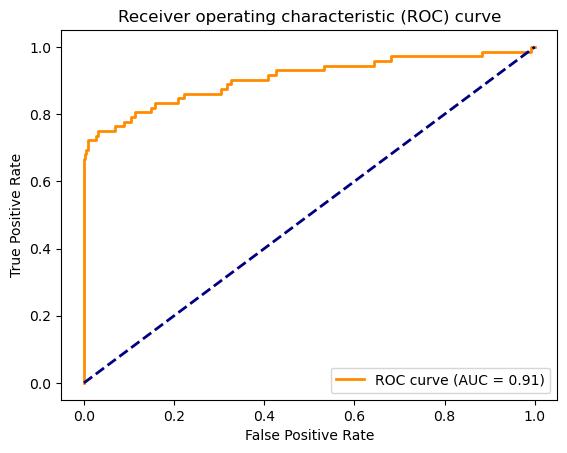

In [136]:
from sklearn.metrics import roc_curve, auc
import torch.nn.functional as F

y_true = data.y
y_pred = softmax_x = F.softmax(test_out, dim=1)
y_pred = y_pred[:, 1].detach().numpy()
print(y_pred)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()